In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/loan-dataset/loan_train.csv
/kaggle/input/loan-dataset/loan_test.csv


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv("../input/loan-dataset/loan_train.csv")
test = pd.read_csv("../input/loan-dataset/loan_test.csv")
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train.shape

(614, 13)

In [5]:
train["Loan_ID"].nunique()

614

In [6]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
train["Gender"].nunique(), train["Education"].nunique(), train.Dependents.nunique()

(2, 2, 4)

In [9]:
full_data = train.append(test, sort=False)
full_data.shape

(981, 13)

In [10]:
full_data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN
363,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NaN
364,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,NaN
365,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN
366,LP002989,Male,No,0,Graduate,Yes,9200,0.0,98.0,180.0,1.0,Rural,NaN


In [11]:
full_data.set_index("Loan_ID", inplace=True)
full_data.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN
LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NaN
LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,NaN
LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN
LP002989,Male,No,0,Graduate,Yes,9200,0.0,98.0,180.0,1.0,Rural,NaN


In [12]:
avg = (full_data["CoapplicantIncome"]/full_data["LoanAmount"]).mean()
avg

12.030002363601993

**Here we are using the ratio of CoapplicantIncome and LoanAmount for filling the Null values.**

In [13]:
full_data["LoanAmount"] = full_data["CoapplicantIncome"].apply(lambda x : x/12.030002363601993 if x == "NaN" else x)

In [14]:
full_data["CoapplicantIncome"] = full_data["LoanAmount"].apply(lambda x : x * 12.030002363601993 if x == "NaN" else x)
full_data["CoapplicantIncome"].isna().sum()

0

In [15]:
full_data["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [16]:
full_data["Education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [17]:
# full_data["Gender"] = full_data[["Education", "Property_Area"]].apply(lambda x: "Female" if x[0]=="Not Graduate" and x[1]=="Rural" else "Male")
def Gender(x):
    if x[0] == "Not Graduate" and x[1] == "Rural":
        return "Female"
    else:
        return "Male"


full_data["Gender"] = full_data[["Education", "Property_Area"]].apply(lambda x : Gender(x), axis=1)

In [18]:
full_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,1508.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,0.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,2358.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,0.0,360.0,1.0,Urban,Y


In [19]:
full_data["Gender"].isna().sum()

0

In [20]:
full_data["LoanAmount"] = full_data["LoanAmount"].fillna(full_data["LoanAmount"].mean())
full_data["Loan_Amount_Term"] = full_data["Loan_Amount_Term"].fillna(360.0)

In [21]:
full_data["Self_Employed"] = full_data["Self_Employed"].fillna(method="ffill")
full_data.isna().sum()

Gender                 0
Married                3
Dependents            25
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [22]:
full_data.isna().sum()

Gender                 0
Married                3
Dependents            25
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

### **Using Fillna to fill the Null values.**

In [23]:
full_data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [24]:
full_data[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',\
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',\
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']] = full_data[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',\
                                                                           'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',\
                                                                           'Loan_Amount_Term', 'Credit_History', 'Property_Area']].fillna(method="ffill")

In [25]:
full_data.isna().sum()

Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

## **Count the Male and Female in the Dataset.**

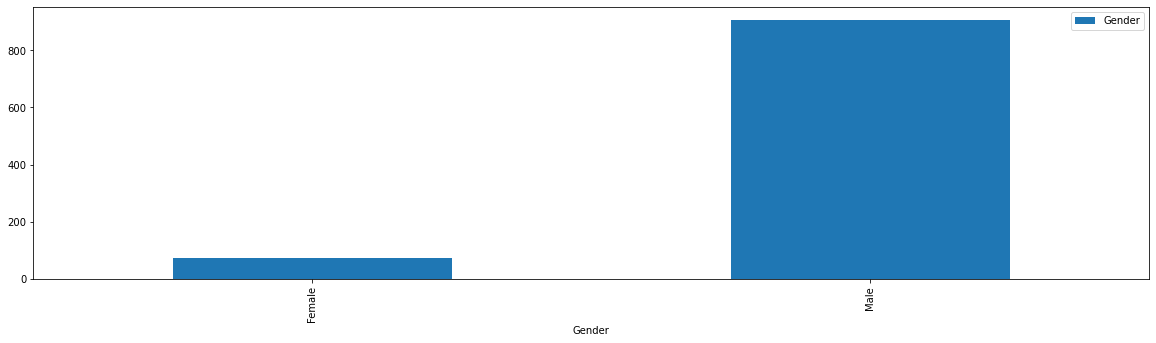

In [26]:
full_data.groupby("Gender").agg({"Gender":"count"}).plot.bar(figsize=(20, 5))

## **Analysis of Male and Female education background.**

Text(0.5, 0, 'Gender & Education')

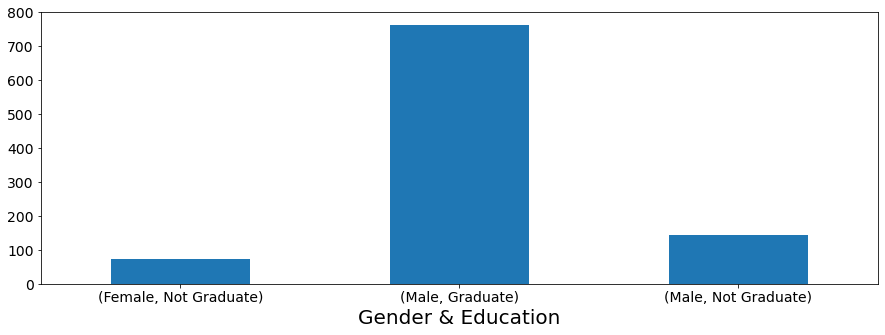

In [27]:
full_data.groupby(["Gender", "Education"])["Education"].apply(lambda x: x.count()).plot.bar(figsize=(15, 5), fontsize=14)
plt.xticks(rotation=0)
plt.xlabel("Gender & Education", fontsize=20)

### **From above Graph it is clear that not a single women educated in this dataset.**

In [28]:
full_data.isna().sum()

Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

In [29]:
full_data.loc[(full_data["Gender"]=="Female") & (full_data["Property_Area"]=="Urban")].size

0

### **Not a single living in Urban area from our dataset.**

## **Percentage of Married and Unmarried.**

Text(0.5, 1.0, 'Married')

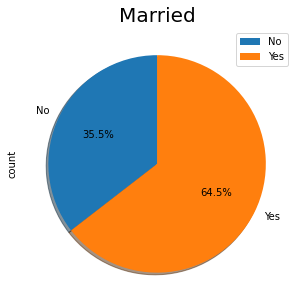

In [30]:
full_data.groupby("Married")["Married"].agg({"count"}).plot.pie(figsize=(25, 5), \
                                                                autopct='%1.1f%%',shadow=True, startangle=90, subplots=True)
plt.title("Married", fontsize=20)

From above graph it is clear that the around 65 persons are married and remaining 35 unmarried in our dataset.

In [31]:
# fig1, ax1 = plt.subplots()
# ax1.pie(maried_data["count"], labels=maried_data.index, autopct='%1.1f%%',
#         shadow=True, startangle=90)
# ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# plt.show()

In [32]:
full_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,1508.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,0.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,2358.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,0.0,360.0,1.0,Urban,Y


In [33]:
# fontsize=12,autopct='%1.1f%%',shadow=True,startangle=90,subplots=True

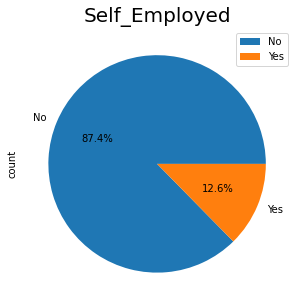

In [34]:
full_data.groupby("Self_Employed")["Self_Employed"].agg({"count"}).plot.pie(figsize=(25, 5), subplots=True, autopct="%1.1f%%")
plt.title("Self_Employed", fontsize=20) 

plt.show()

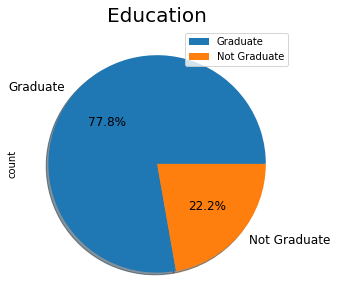

In [35]:
full_data.groupby("Education")["Education"].agg({"count"}).plot.pie(figsize=(25, 5), \
                                                                    fontsize=12, \
                                                                    autopct="%1.1f%%",
                                                                    shadow=True, \
                                                                    subplots=True
                                                                   )
plt.title("Education", fontsize=20)
plt.show()

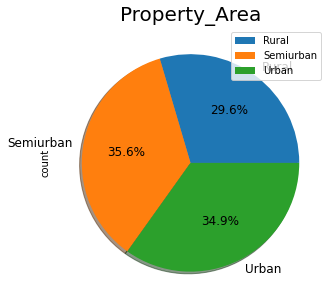

In [36]:
full_data.groupby("Property_Area")["Property_Area"].agg({"count"}).plot.pie(figsize=(25, 5), \
                                                                    fontsize=12, \
                                                                    autopct="%1.1f%%",
                                                                    shadow=True, \
                                                                    subplots=True
                                                                   )
plt.title("Property_Area", fontsize=20)
plt.show()

In [37]:
full_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,1508.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,0.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,2358.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,0.0,360.0,1.0,Urban,Y


In [38]:
full_data.Credit_History.unique()

array([1., 0.])

## **Chi Square Test**

In [39]:
import scipy.stats as stats
from scipy.stats import chi2

In [40]:
def chi2test(mat):
    Observed_Values = mat.values 
    
    val=stats.chi2_contingency(mat)
    
    Expected_Values = val[3]
    
    no_of_rows=len(mat.iloc[0:2,0])
    no_of_columns=len(mat.iloc[0,0:2])
    
    ddof=(no_of_rows-1)*(no_of_columns-1)
    
#     print("Degree of Freedom : ",ddof)
    alpha = 0.05
    chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
    
    chi_square_statistic=chi_square[0]+chi_square[1]
    
    critical_value=chi2.ppf(q=1-alpha,df=ddof)
    
    p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
    
#     print('p-value:',p_value)
#     print('Significance level: ',alpha)
#     print('Degree of Freedom: ',ddof)
    
    if p_value<=alpha:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")
    
   
    

In [41]:
train.shape

(614, 13)

In [42]:
train_full_data = full_data.iloc[:614, :]
train_full_data.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP002978,Male,No,0,Graduate,No,2900,0.0,0.0,360.0,1.0,Rural,Y
LP002979,Male,Yes,3+,Graduate,No,4106,0.0,0.0,180.0,1.0,Rural,Y
LP002983,Male,Yes,1,Graduate,No,8072,240.0,240.0,360.0,1.0,Urban,Y
LP002984,Male,Yes,2,Graduate,No,7583,0.0,0.0,360.0,1.0,Urban,Y
LP002990,Male,No,0,Graduate,Yes,4583,0.0,0.0,360.0,0.0,Semiurban,N


In [43]:
education = pd.crosstab(train_full_data["Loan_Status"], train_full_data["Education"])
education

Education,Graduate,Not Graduate
Loan_Status,,
N,140,52
Y,340,82


In [44]:
chi2test(education)

Reject H0,There is a relationship between 2 categorical variables


Using **chi 2 test** it is clear that the there is **relationship** between the **Loan_Status** and **Education** of the Applicants.

In [45]:
married = pd.crosstab(train_full_data["Married"], train_full_data["Loan_Status"])
married

Loan_Status,N,Y
Married,,
No,79,135
Yes,113,287


In [46]:
chi2test(married)

Reject H0,There is a relationship between 2 categorical variables


Above **p_value** is less than **0.05**, means the that there is **relationship** between the **loan status** of the applicant and **married** status.

In [47]:
train_full_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,1508.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,0.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,2358.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,0.0,360.0,1.0,Urban,Y


In [48]:
gender = pd.crosstab(train_full_data["Gender"], train_full_data["Loan_Status"])
gender

Loan_Status,N,Y
Gender,,
Female,22,26
Male,170,396


In [49]:
chi2test(gender)

Reject H0,There is a relationship between 2 categorical variables


In [50]:
property_area = pd.crosstab(train_full_data["Property_Area"], train_full_data["Loan_Status"])
property_area

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


In [51]:
chi2test(property_area)

Reject H0,There is a relationship between 2 categorical variables


In [52]:
credit = pd.crosstab(train_full_data["Credit_History"], train_full_data["Loan_Status"])
chi2test(credit)

Reject H0,There is a relationship between 2 categorical variables


## Seperate the train and test dataset

In [53]:
train_df=full_data.iloc[:614, :]
test_df=full_data.iloc[614:, :12]
train_df.shape, test_df.shape

((614, 12), (367, 12))

In [54]:
dum_train=pd.get_dummies(train_df, drop_first=True)
dum_test=pd.get_dummies(test_df, drop_first=True)
dum_train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
Loan_ID,,,,,,,,,,,,,,,
LP001002,5849,0.0,0.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
LP001003,4583,1508.0,1508.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
LP001005,3000,0.0,0.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
LP001006,2583,2358.0,2358.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
LP001008,6000,0.0,0.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1


In [55]:
dum_train.shape, dum_test.shape

((614, 15), (367, 14))

## Seperate the X_train and y_train

In [56]:
X_train=dum_train.drop("Loan_Status_Y", axis=1)
y_train=dum_train["Loan_Status_Y"]
X_test=dum_test

## Import the Library

In [57]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import graphviz 
from sklearn import tree
from sklearn.metrics import roc_curve, roc_auc_score

## XGBoost

In [58]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [59]:
xg_model = xgb.XGBRegressor()
xg_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

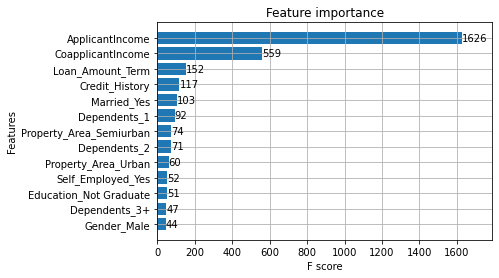

In [60]:
xgb.plot_importance(xg_model, height=0.8)

In [61]:
y_test_pred_xg = xg_model.predict(X_test)

In [62]:
y_test_pred_xg = pd.DataFrame(y_test_pred_xg)
y_test_pred_xg.rename(columns={0:"y_pred"}, inplace=True)
y_test_pred_xg.columns

Index(['y_pred'], dtype='object')

In [63]:
y_test_pred_xg = y_test_pred_xg["y_pred"].map(lambda x: "Y" if x>0.5 else "N")

In [64]:
y_test_pred_xg.value_counts()

Y    268
N     99
Name: y_pred, dtype: int64

In [65]:
y_train_pred_xg = xg_model.predict(X_train)

In [66]:
trainScore = mean_squared_error(y_train, y_train_pred_xg)
print('Train Score: %.2f MSE' % (trainScore))

Train Score: 0.00 MSE


In [67]:
trainScore = mean_absolute_error(y_train, y_train_pred_xg)
print('Train Score: %.2f MAE' % (trainScore))

Train Score: 0.03 MAE


## Using Naive Bayes

In [68]:
clf_NB = GaussianNB()
clf_NB.fit(X_train, y_train)
y_pred_NB = clf_NB.predict(X_test)
y_pred_NB.shape

(367,)

### Accuracy

In [69]:
y_pred_prob1 = clf_NB.predict_proba(X_train)[:,1]
roc_auc_score(y_train, y_pred_prob1)

0.7756714060031595

In [70]:
clf_NB

GaussianNB()

## Logistic Regression

In [71]:
clf_log=LogisticRegression(random_state=2020)
clf_log.fit(X_train, y_train)
y_pred_log=clf_log.predict(X_test)

### Accuracy

In [72]:
y_pred_prob2 = clf_log.predict_proba(X_train)[:,1]
roc_auc_score(y_train, y_pred_prob2)

0.7851500789889416

## Decision Tree

In [73]:
depth_range = [3,4,5,6,7,8,9]
minsplit_range = [5,10,20,25,30]
minleaf_range = [5,10,15]

In [74]:
parameters = dict(max_depth=depth_range,
                  min_samples_split=minsplit_range, 
                  min_samples_leaf=minleaf_range)

In [75]:
kfold = StratifiedKFold(n_splits=5)

In [76]:
clf_dt = DecisionTreeClassifier(random_state=2018,max_depth= 9, min_samples_leaf= 5, min_samples_split= 30)
clf_dt.fit(X_train, y_train)
cv = GridSearchCV(clf_dt, param_grid=parameters,
                  cv=kfold,scoring='roc_auc')

cv.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(max_depth=9, min_samples_leaf=5,
                                              min_samples_split=30,
                                              random_state=2018),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [5, 10, 20, 25, 30]},
             scoring='roc_auc')

In [77]:
print(cv.best_params_)
print(cv.best_score_)

{'max_depth': 8, 'min_samples_leaf': 10, 'min_samples_split': 30}
0.7507779913584868


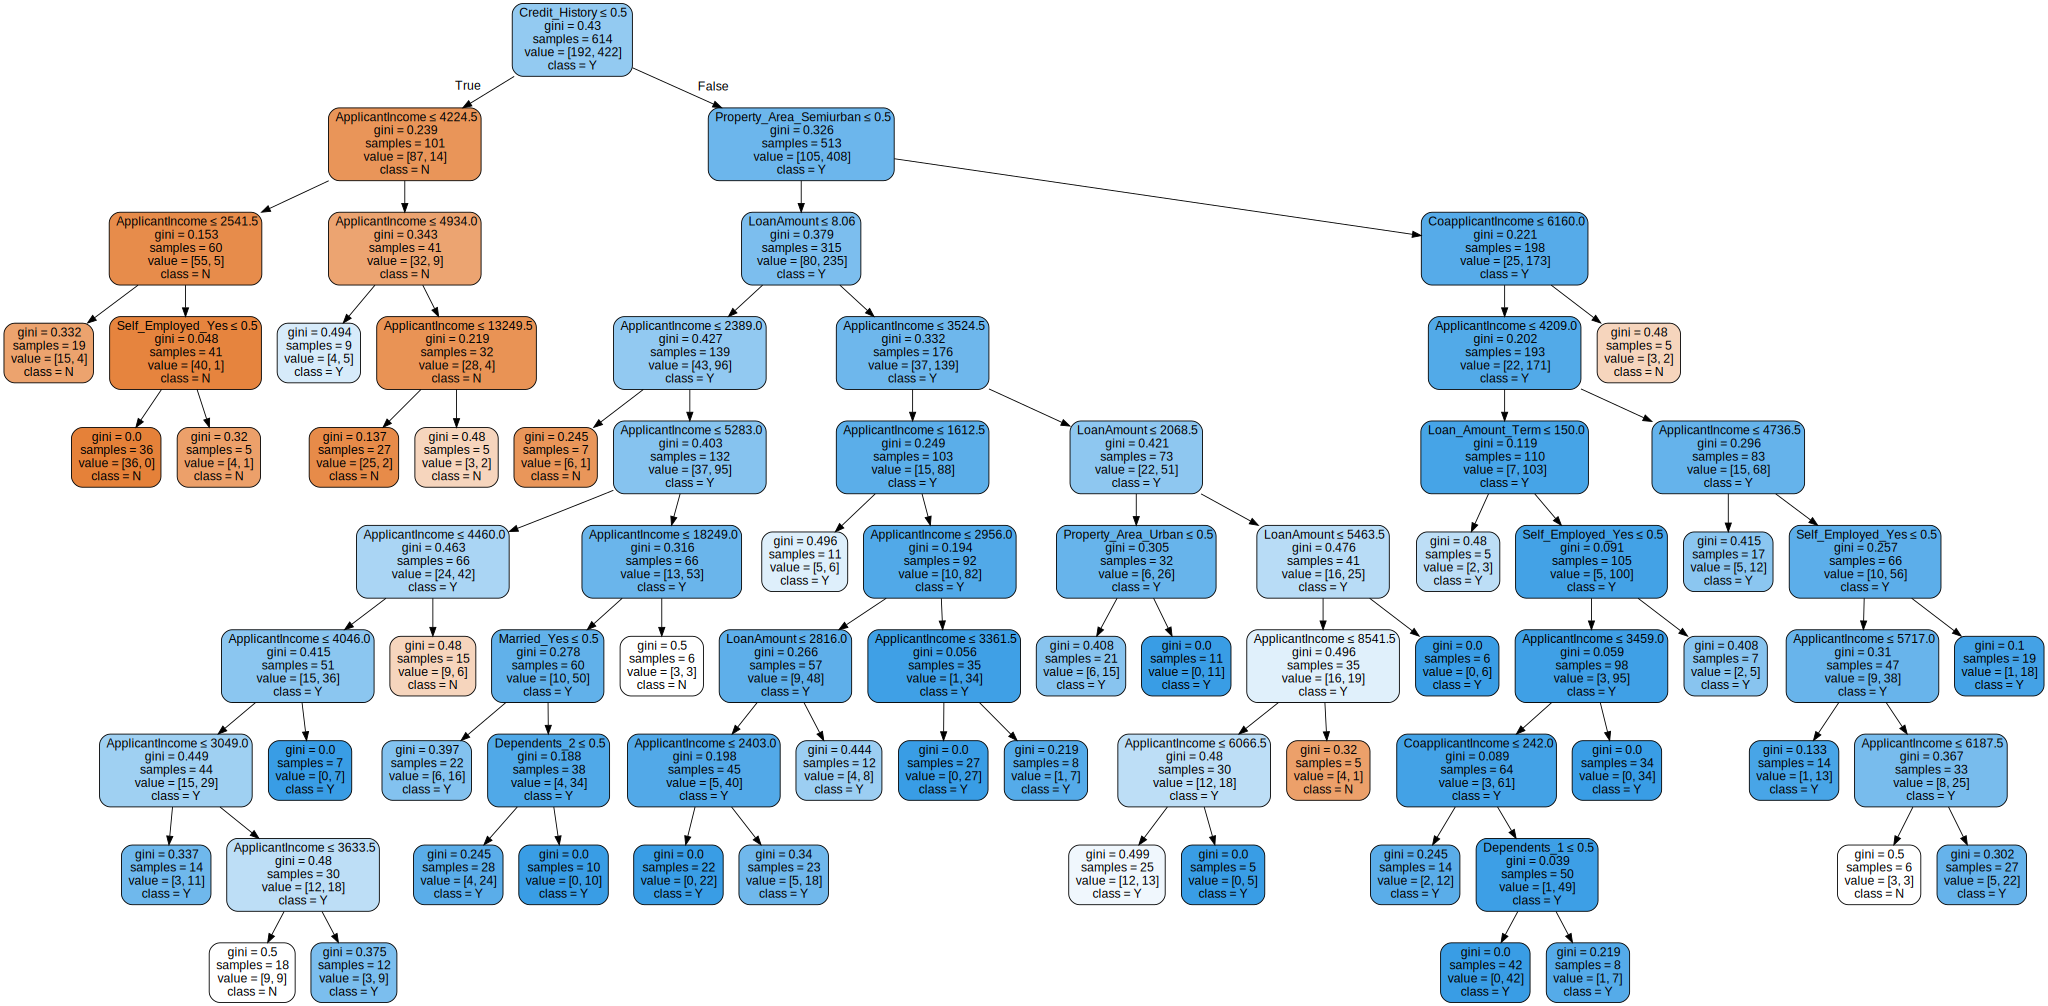

In [80]:
dot_data = tree.export_graphviz(clf_dt, out_file=None, 
                         feature_names=X_train.columns,  
                         class_names=['N','Y'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

## Voting Algorithm

In [81]:
from sklearn.ensemble import VotingClassifier

In [82]:
Voting = VotingClassifier(estimators=[('NB',clf_NB),
                                      ('LOG',clf_log),
                                      
                                     ('RAND', clf_dt)],voting='soft')

In [83]:
Voting.fit(X_train,y_train)
y_pred_vote = Voting.predict(X_test)

## Random Forest Tree

In [84]:
from sklearn.ensemble import RandomForestClassifier

depth_range = [3,4,5,6,7,8,9]
minsplit_range = [5,10,20,25,30]
minleaf_range = [5,10,15]
feature=np.arange(1,11,10)
estimator=[100,200,500]

parameters = dict(max_depth=depth_range,
                  min_samples_split=minsplit_range, 
                  min_samples_leaf=minleaf_range,
                 max_features=feature,
                  n_estimators=estimator)

In [85]:
clf_rand=RandomForestClassifier(random_state=2020)
ran_cv=GridSearchCV(clf_rand, param_grid=parameters,
                  cv=kfold,scoring='roc_auc')

ran_cv.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(random_state=2020),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'max_features': array([1]),
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [5, 10, 20, 25, 30],
                         'n_estimators': [100, 200, 500]},
             scoring='roc_auc')

In [86]:
print(ran_cv.best_params_)
print(ran_cv.best_score_)

{'max_depth': 8, 'max_features': 1, 'min_samples_leaf': 5, 'min_samples_split': 20, 'n_estimators': 100}
0.7855794841553354


In [87]:
y_pred_ran=ran_cv.predict(X_test)

In [88]:
clf_rand2=RandomForestClassifier(max_depth= 9, max_features= 1, 
                                 min_samples_leaf= 5, min_samples_split= 5, 
                                 n_estimators= 100)
clf_rand2.fit(X_train, y_train)
y_pred_ran2=clf_rand2.predict(X_test)

In [89]:
clf_rand3=RandomForestClassifier(max_depth= 9, max_features= 1, 
                                 min_samples_leaf= 5, min_samples_split= 5, 
                                 n_estimators= 100, random_state=2020)
clf_rand3.fit(X_train, y_train)
y_pred_ran3=clf_rand3.predict(X_test)